In [90]:
import torch
import torchvision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 对于torchvision存在的数据集

tensor的数据储存结构为(batch,channel,high,weight)

先载入训练集

In [93]:
mnist_train=torchvision.datasets.MNIST(root='../mnist/',
    train=True,                                    # 如果这里选择True，载入的就是训练集，如果为False，载入的就是测试集
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),                   # 将PIL格式转换为tensor 
        torchvision.transforms.Normalize((0.1307,), (0.3081,))]),        # normalize in the range [0.0, 1.0]
        #如果图片是灰度图，那么normalize就是一个如上格式且数字后带逗号的格式(mean1,),(std1,)
        #如果图片为彩色图片，则为(mean1,mean2,mean3),(std1,std2,std3)
    download=True)    #选择true代表下载数据集

再载入测试集

In [153]:
mnist_test=torchvision.datasets.MNIST(root='../mnist/',
    train=False,                                    # 如果这里选择True，载入的就是训练集，如果为False，载入的就是测试集
    transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),                   # 将PIL格式转换为tensor 
        torchvision.transforms.Normalize((0.1307,), (0.3081,))]),        # normalize in the range [0.0, 1.0]
        #如果图片是灰度图，那么normalize就是一个如上格式且数字后带逗号的格式(mean1,),(std1,)
        #如果图片为彩色图片，则为(mean1,mean2,mean3),(std1,std2,std3)
    download=True)    #选择true代表下载数据集

In [99]:
dir(mnist_train)   #该方法可以查看载入的数据集的属性
#mnist_train.__dir__()    这样也可以，但不会进行排序

['__add__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_exists',
 '_check_legacy_exist',
 '_format_transform_repr',
 '_is_protocol',
 '_load_data',
 '_load_legacy_data',
 '_repr_indent',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'mirrors',
 'processed_folder',
 'raw_folder',
 'resources',
 'root',
 'target_transform',
 'targets',
 'test_data',
 'test_file',
 'test_labels',
 'train',
 'train_data',
 'train_labels',
 'training_file',
 'transform',
 'transforms']

In [104]:
mnist_train.data    #可以通过.data查看数据集的特征
mnist_train.targets  #可以通过.targets查看数据集的标签

tensor([5, 0, 4,  ..., 5, 6, 8])

直接使用torch.utils.data.DataLoader对数据集进行batch

In [105]:
train_loader=torch.utils.data.DataLoader(
    dataset=mnist_train,      #导入对应的训练集
    batch_size=5000,          #一个batch_size的大小，要根据数据集的shape来设置
    shuffle=True,             #该选项为True就打乱数据集
    drop_last=True)                 #该选项为True就把batch_size里面不够的那一块扔了

In [106]:
test_loader=torch.utils.data.DataLoader(
    dataset=mnist_test,      #导入对应的训练集
    batch_size=5000,          #一个batch_size的大小，要根据数据集的shape来设置
    shuffle=True,             #该选项为True就打乱数据集
    drop_last=True)                 #该选项为True就把batch_size里面不够的那一块扔了

分批次读取训练集

In [196]:
for batch,(b_x,b_y) in enumerate(train_loader):   #batch为划分好的批次，b_x为训练集的特征，b_y为训练集的标签
    print(batch,"\n",b_x.shape,"\n",b_y.shape,"\n")

0 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

1 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

2 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

3 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

4 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

5 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

6 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

7 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 



分批次读取测试集

In [181]:
for batch,(b_x,b_y) in enumerate(test_loader):   #batch为划分好的批次，b_x为测试集的特征，b_y为测试集的标签
    print(batch,"\n",b_x.shape,"\n",b_y.shape,"\n")

0 
 torch.Size([5000, 783]) 
 torch.Size([5000]) 

1 
 torch.Size([5000, 783]) 
 torch.Size([5000]) 

2 
 torch.Size([5000, 783]) 
 torch.Size([5000]) 

3 
 torch.Size([5000, 783]) 
 torch.Size([5000]) 

4 
 torch.Size([5000, 783]) 
 torch.Size([5000]) 



可以根据训练集打印前五张图片看看

imshow的图片读取格式为(h,w,c)
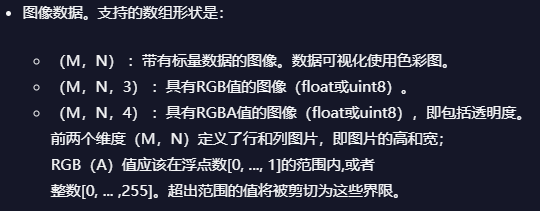

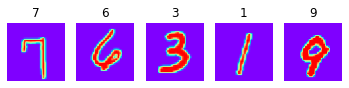

In [203]:
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(b_x[i,:].reshape(-1,28,28).permute(1,2,0),cmap="rainbow")    #利用permute方法可以转换图片的通道，通过cmap参数可以改变图像的color    
    plt.title(b_y[i].numpy())          #将targets转变为numpy格式可以更美观的输出
    plt.axis("off")

# 自己导入的数据集（不重写dataset类）

可以使用pandas进行数据的导入

In [141]:
train=pd.read_csv(r"C:\Users\Administrator\Desktop\手写数字识别\train.csv").values     #通过.values转化为numpy格式提高运行效率
test=pd.read_csv(r"C:\Users\Administrator\Desktop\手写数字识别\test.csv").values       #通过.values转化为numpy格式提高运行效率

进行特征和标签的划分

In [209]:
train_data=torch.tensor(train[:,1:],dtype=torch.float32)
train_targets=torch.tensor(train[:,0],dtype=torch.int)
test_data=torch.tensor(test,dtype=torch.float32)   #由于该数据集的测试集没有只有特征没有标签，所以不进行标签划分

进行批次划分

In [210]:
train_loader=torch.utils.data.DataLoader(
    dataset=[*zip(train_data,train_targets)],      #导入对应的训练集的特征和标签
    batch_size=5000,          #一个batch_size的大小，要根据数据集的shape来设置
    shuffle=True,             #该选项为True就打乱数据集
    drop_last=True)                 #该选项为True就把batch_size里面不够的那一块扔了

test_loader=torch.utils.data.DataLoader(
    dataset=test_data,      #导入对应的测试集的特征和标签
    batch_size=5000,          #一个batch_size的大小，要根据数据集的shape来设置
    shuffle=True,             #该选项为True就打乱数据集
    drop_last=True)                 #该选项为True就把batch_size里面不够的那一块扔了

进行批次读取

0 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

1 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

2 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

3 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

4 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

5 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

6 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 

7 
 torch.Size([5000, 784]) 
 torch.Size([5000]) 



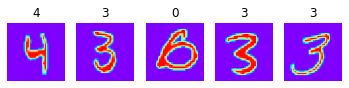

In [214]:
for batch,(b_x,b_y) in enumerate(train_loader):
    print(batch,"\n",b_x.shape,"\n",b_y.shape,"\n")
    
#训练集的前五张打印看看
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(b_x[i,:].reshape(-1,28,28).permute(1,2,0),cmap="rainbow")    #利用permute方法可以转换图片的通道，通过cmap参数可以改变图像的color    
    plt.title(b_y[i].numpy())          #将targets转变为numpy格式可以更美观的输出
    plt.axis("off")

0 
 torch.Size([5000, 784]) 

1 
 torch.Size([5000, 784]) 

2 
 torch.Size([5000, 784]) 

3 
 torch.Size([5000, 784]) 

4 
 torch.Size([5000, 784]) 



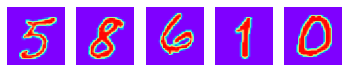

In [215]:
for batch,b_x in enumerate(test_loader):
    print(batch,"\n",b_x.shape,"\n")

#测试集的前五张打印看看
plt.figure()
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(b_x[i,:].reshape(-1,28,28).permute(1,2,0),cmap="rainbow")    #利用permute方法可以转换图片的通道，通过cmap参数可以改变图像的color    
    plt.axis("off")

In [ ]:
|